![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadistica
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [18]:
# 1.
df = pd.read_csv('datasets_beers.csv')
df
# 2.
df.head(12)
# df.tail(12)


,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [10]:
# 3.
df.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

In [15]:
# 4.
print('Qué dimensiones tiene (tamaño): ', df.shape)
print('Nº de dimensiones (dataframe siempre 2): ', df.ndim)

Qué dimensiones tiene (tamaño):  (2410, 8)
Nº de dimensiones (dataframe siempre 2):  2


## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [16]:
df = df.drop('Unnamed: 0', axis = 1)
# df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.drop('Unnamed: 0', axis = 1)

In [17]:
df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [24]:
print('Filas', df.shape[0])
print('Columnas', df.shape[1])

Filas 2410
Columnas 7


In [27]:
print(len(df))
print(len(df.columns))

2410
7


## Ejercicio 5
¿De qué tipo son los datos?

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [30]:
df.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

## Ejercicio 6
Obtén en una nuevo DataFrame un resumen con las principales estadísticas de las columnas numércias: mean, max, count, cuantiles...

In [32]:
df.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [38]:
len(df.groupby(['style']))

99

In [41]:
len(df['style'].unique())

100

In [46]:
contador = 0
for pos, elem in enumerate(df['style'].unique()):
    print('pos', pos)
    print('elem', elem)

pos 0
elem American Pale Lager
pos 1
elem American Pale Ale (APA)
pos 2
elem American IPA
pos 3
elem American Double / Imperial IPA
pos 4
elem Oatmeal Stout
pos 5
elem American Porter
pos 6
elem Saison / Farmhouse Ale
pos 7
elem Belgian IPA
pos 8
elem Cider
pos 9
elem Baltic Porter
pos 10
elem Tripel
pos 11
elem American Barleywine
pos 12
elem Winter Warmer
pos 13
elem American Stout
pos 14
elem Fruit / Vegetable Beer
pos 15
elem English Strong Ale
pos 16
elem American Black Ale
pos 17
elem Belgian Dark Ale
pos 18
elem American Blonde Ale
pos 19
elem American Amber / Red Ale
pos 20
elem Berliner Weissbier
pos 21
elem American Brown Ale
pos 22
elem American Pale Wheat Ale
pos 23
elem Belgian Strong Dark Ale
pos 24
elem Kölsch
pos 25
elem English Pale Ale
pos 26
elem American Amber / Red Lager
pos 27
elem English Barleywine
pos 28
elem Milk / Sweet Stout
pos 29
elem German Pilsener
pos 30
elem Pumpkin Ale
pos 31
elem Belgian Pale Ale
pos 32
elem American Pilsner
pos 33
elem American Wild

In [50]:
df[df['style'].isna()]

,abv,ibu,id,name,style,brewery_id,ounces
566,NaN,NaN,2210,Special Release,NaN,29,16.0
853,0.060,21.0,1635,Kilt Lifter Scottish-Style Ale,NaN,160,12.0
866,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0
1554,NaN,NaN,1796,The CROWLER™,NaN,166,32.0
1555,NaN,NaN,1790,CAN'D AID Foundation,NaN,166,12.0


In [52]:
df['style'].nunique()

99

In [71]:
pd.set_option('display.max_rows', 50)

In [64]:

df.groupby(['style'])['name'].count().sort_values(ascending = False)

style
American IPA                           424
American Pale Ale (APA)                245
American Amber / Red Ale               133
American Blonde Ale                    108
American Double / Imperial IPA         105
American Pale Wheat Ale                 97
American Brown Ale                      70
American Porter                         68
Saison / Farmhouse Ale                  52
Witbier                                 51
Fruit / Vegetable Beer                  49
Kölsch                                  42
Hefeweizen                              40
American Pale Lager                     39
American Stout                          39
Cider                                   37
American Black Ale                      36
German Pilsener                         36
Märzen / Oktoberfest                    30
Cream Ale                               29
American Amber / Red Lager              29
Czech Pilsener                          28
American Pilsner                        25
Belgi

In [58]:
df['style'].value_counts()

American IPA                           424
American Pale Ale (APA)                245
American Amber / Red Ale               133
American Blonde Ale                    108
American Double / Imperial IPA         105
American Pale Wheat Ale                 97
American Brown Ale                      70
American Porter                         68
Saison / Farmhouse Ale                  52
Witbier                                 51
Fruit / Vegetable Beer                  49
Kölsch                                  42
Hefeweizen                              40
American Pale Lager                     39
American Stout                          39
Cider                                   37
German Pilsener                         36
American Black Ale                      36
Märzen / Oktoberfest                    30
American Amber / Red Lager              29
Cream Ale                               29
Czech Pilsener                          28
American Pilsner                        25
Belgian Pal

In [72]:
df[df['ibu'].isnull()]

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2403,0.055,NaN,1045,Wynkoop Pumpkin Ale,Pumpkin Ale,424,12.0
2404,0.075,NaN,1035,Rocky Mountain Oyster Stout,American Stout,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0


## Ejercicio 8
1. Imprime por pantalla los registros del 10 al 20
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [81]:
df.iloc[10:21][['name','style','brewery_id','ounces']]

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [82]:
df[10:21][['name','style','brewery_id','ounces']]

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [84]:
df.loc[10:20, 'name':'ounces']

,name,style,brewery_id,ounces
10,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,Troll Destroyer,Belgian IPA,177,12.0
14,Bitter Bitch,American Pale Ale (APA),177,12.0
15,Ginja Ninja,Cider,154,12.0
16,Cherried Away,Cider,154,12.0
17,Rhubarbarian,Cider,154,12.0
18,BrightCider,Cider,154,12.0
19,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [85]:
df.loc[10:20, ['abv','ibu','ounces']]

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


In [86]:
df.loc[10:20, ['abv','ibu','ounces']].values

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [87]:
np.array(df.loc[10:20, ['abv','ibu','ounces']])

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [100]:
df.loc[10:20, ['abv','ibu','ounces']].to_numpy()

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [102]:
df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [101]:
df['ounces'].sum()

32757.3

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [105]:
round(df['ibu'].mean(), 3)

42.713

In [108]:
df['ibu'].mean().round(2)

42.71

In [112]:
df['ibu'].max()

138.0

In [113]:
valor_max = df['ibu'].max()
valor_max * 2

276.0

In [111]:
df['ibu'].agg(['max','min'])

max    138.0
min      4.0
Name: ibu, dtype: float64

In [124]:
df[df['ibu'] == df['ibu'].max()][['name','ibu']]

,name,ibu
147,Bitter Bitch Imperial IPA,138.0


In [127]:
df[df['ibu'] == 138][['name','ibu']]

,name,ibu
147,Bitter Bitch Imperial IPA,138.0


In [131]:
x = 138 # Asignar variable
x == 138 # Condicional


True

In [132]:
df['ibu'] == 138

0       False
1       False
2       False
3       False
4       False
        ...  
2405    False
2406    False
2407    False
2408    False
2409    False
Name: ibu, Length: 2410, dtype: bool

In [134]:
df[df['ibu'] == 138]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [128]:
df[df['ibu'] == df['ibu'].min()][['name','ibu']]

,name,ibu
106,Summer Solstice,4.0
112,Summer Solstice Cerveza Crema (2009),4.0
117,Summer Solstice (2011),4.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [143]:
# Respuesta
df['ibu'].var()
df['ibu'].std()

25.954065911259317

In [135]:
df['ibu'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [142]:
df['ibu'].mode()

0    20.0
dtype: float64

In [136]:
ibu_filled = df['ibu'].fillna(0)
stats.iqr(ibu_filled)

41.0

In [138]:
df['ibu'].var()

673.6135373259929

In [139]:
df['ibu'].std()

25.954065911259317

In [141]:
np.sqrt(df['ibu'].var())

25.954065911259317

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonmiento mediante un gráfico

In [145]:
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [144]:
df.corr()

,abv,ibu,id,brewery_id,ounces
abv,1.000000,0.670621,0.042811,-0.098632,0.172529
ibu,0.670621,1.000000,0.000485,-0.004875,0.054691
id,0.042811,0.000485,1.000000,-0.504030,0.100843
brewery_id,-0.098632,-0.004875,-0.504030,1.000000,-0.133762
ounces,0.172529,0.054691,0.100843,-0.133762,1.000000


<AxesSubplot:>

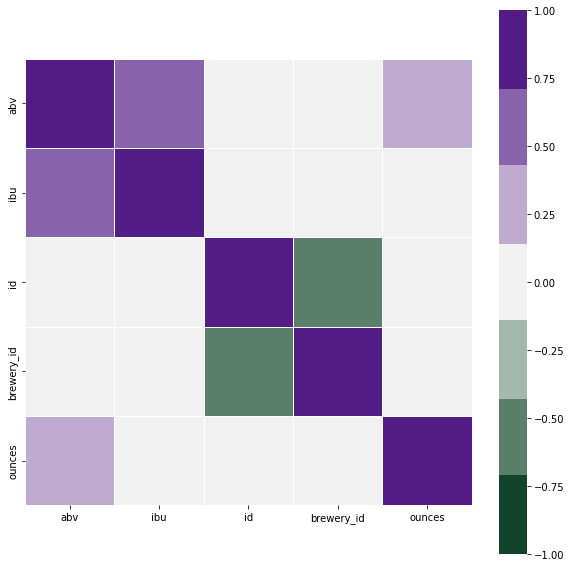

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5)

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

<AxesSubplot:>

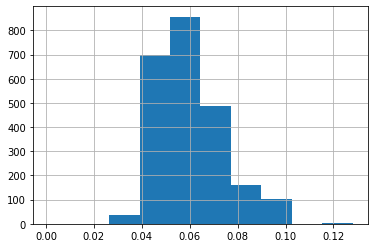

In [149]:
df['abv'].hist()

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

In [151]:
import seaborn as sns

<AxesSubplot:xlabel='ibu'>

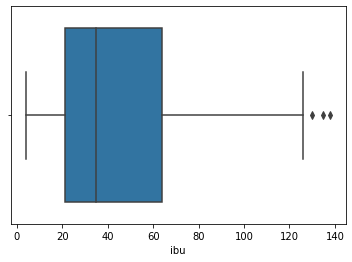

In [153]:
sns.boxplot(x = 'ibu', data = df)

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

In [161]:
df.groupby('style')['abv'].mean().sort_values(ascending = False).head(20)

style
English Barleywine                    0.107667
Quadrupel (Quad)                      0.104000
American Barleywine                   0.099000
American Malt Liquor                  0.099000
Russian Imperial Stout                0.097636
American Double / Imperial Stout      0.093667
American Double / Imperial IPA        0.087369
Tripel                                0.086818
Baltic Porter                         0.085167
Belgian Strong Pale Ale               0.084000
Belgian Strong Dark Ale               0.083833
Flanders Red Ale                      0.083000
English Strong Ale                    0.081750
English Stout                         0.080000
Old Ale                               0.079500
American Double / Imperial Pilsner    0.077500
American Strong Ale                   0.076538
Scotch Ale / Wee Heavy                0.076267
Braggot                               0.075000
Doppelbock                            0.074714
Name: abv, dtype: float64

In [157]:
df.groupby('style')['abv'].mean().idxmax()

'English Barleywine'

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

In [162]:
df2 = pd.read_csv('datasets_breweries.csv')
df2.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [164]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brewery_id    558 non-null    int64 
 1   brewery_name  558 non-null    object
 2   city          558 non-null    object
 3   state         558 non-null    object
dtypes: int64(1), object(3)
memory usage: 17.6+ KB


## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra tb la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

In [163]:
df2 = df2.rename(columns= {'Unnamed: 0': "brewery_id",
                            'name': 'brewery_name'})
df2.head()

,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


## Ejercicio 18
Junta los dos datasets que tienes

In [166]:
display(df)
display(df2)

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


,brewery_id,brewery_name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [167]:
df3 = df.merge(df2, on = 'brewery_id', how = 'inner')
df3

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO


## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

In [174]:
df3['state'].nunique()

51

In [175]:
len(df3['state'].unique())

51

In [178]:
df3['city'].nunique()

384

In [183]:
df3['brewery_name'].nunique()

551

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

In [196]:
df3.groupby(['state','city'])['abv'].agg(['mean','median','max'])

mean  median    max
state city                               
 AK   Anchorage   0.054200  0.0520  0.063
      Juneau      0.053000  0.0530  0.053
      Soldotna    0.058500  0.0580  0.068
      Talkeetna   0.059500  0.0585  0.065
 AL   Birmingham  0.065400  0.0600  0.093
...                    ...     ...    ...
 WI   Wilson      0.055000  0.0550  0.055
 WV   Lewisburg   0.062000  0.0620  0.067
 WY   Jackson     0.054857  0.0520  0.068
      Pinedale    0.061000  0.0610  0.072
      Sheridan    0.052833  0.0480  0.070

[401 rows x 3 columns]

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

In [207]:
# df_indiana = df3[df3['state']==' IN']
df3[df3['state']==' IN'].sort_values(['ibu'], ascending = False)[['name','ibu','state']].head(10)

,name,ibu,state
479,Hopkick Dropkick,115.0,IN
2191,Overlord Imperial IPA,115.0,IN
811,Half Cycle IPA,104.0,IN
2062,Isis,91.0,IN
2189,Csar,90.0,IN
850,The Gadget,90.0,IN
483,3:33 Black IPA,86.0,IN
1623,Mound Builder IPA,77.0,IN
2047,Grapefruit Jungle (GFJ),77.0,IN
2064,Grapefruit Jungle (GFJ) (2011),77.0,IN


In [202]:
df3[df3['state'].str.contains('IN')]

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2195,0.045,35.0,948,Circuit Bohemian Pilsner,Czech Pilsener,17,16.0,Tin Man Brewing Company,Evansville,IN
2275,0.045,50.0,2190,Campside Session IPA,American IPA,202,16.0,Upland Brewing Company,Bloomington,IN
2276,0.045,15.0,1951,Upland Wheat Ale,Witbier,202,16.0,Upland Brewing Company,Bloomington,IN
2277,0.060,NaN,1950,Dragonfly IPA,American IPA,202,16.0,Upland Brewing Company,Bloomington,IN


## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

In [208]:
df3.groupby('city')['ibu'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Abingdon,1.0,135.000000,NaN,135.0,135.00,135.0,135.00,135.0
Abita Springs,3.0,27.333333,21.455380,13.0,15.00,17.0,34.50,52.0
Ada,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afton,4.0,43.000000,19.899749,22.0,28.00,45.0,60.00,60.0
Airway Heights,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Woodinville,4.0,46.750000,18.643587,27.0,39.75,44.0,51.00,72.0
Worcester,1.0,69.000000,NaN,69.0,69.00,69.0,69.00,69.0
Yakima,2.0,54.000000,22.627417,38.0,46.00,54.0,62.00,70.0


## Ejercicio 23
Consigue en un DataFrame todas las cervezas en cuyas cervecerías el mínimo nivel de `abv` sea de 0.07.

In [215]:
df_breweries = df3.groupby('brewery_name')['abv'].min().to_frame()
df_breweries

,abv
brewery_name,
10 Barrel Brewing Company,0.050
18th Street Brewery,0.045
2 Towns Ciderhouse,0.060
21st Amendment Brewery,0.044
3 Daughters Brewing,0.050
...,...
Woodchuck Hard Cider,0.050
"Woodstock Inn, Station & Brewery",0.028
Wormtown Brewery,0.065


In [226]:
df_breweries[df_breweries['abv'] >= 0.07]

,abv
brewery_name,
Asher Brewing Company,0.070
Bare Hands Brewery,0.070
Beach Brewing Company,0.088
Black Acre Brewing Co.,0.072
Blue Hills Brewery,0.080
Borderlands Brewing Company,0.071
Christian Moerlein Brewing Company,0.089
Daredevil Brewing Company,0.072
Engine 15 Brewing,0.070


In [221]:
def filter_func(x):
    return x['abv'].min() >= 0.07

In [229]:
df3.groupby('brewery_name').filter(filter_func)[['brewery_name','abv']]

,brewery_name,abv
137,Asher Brewing Company,0.070
191,Bare Hands Brewery,0.070
212,Beach Brewing Company,0.088
275,Black Acre Brewing Co.,0.072
309,Blue Hills Brewery,0.080
354,Borderlands Brewing Company,0.071
594,Christian Moerlein Brewing Company,0.089
690,Daredevil Brewing Company,0.072
752,Engine 15 Brewing,0.070
884,Frog Level Brewing Company,0.070


In [228]:
df3.loc[df['abv'] >= 0.07][['brewery_name', 'abv']]

,brewery_name,abv
2,18th Street Brewery,0.071
3,18th Street Brewery,0.090
4,18th Street Brewery,0.075
5,18th Street Brewery,0.077
9,18th Street Brewery,0.086
...,...,...
2380,Wingman Brewers,0.080
2382,Wisconsin Brewing Company,0.071
2398,Worthy Brewing Company,0.077
2402,Wynkoop Brewing Company,0.082


## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [231]:
mean_ibu = df3['ibu'].mean()
print(mean_ibu)

42.71316725978647


In [232]:
df_breweries = df3.groupby('state')['ibu'].mean().to_frame()
df_breweries

,ibu
state,
AK,40.882353
AL,51.222222
AR,39.000000
AZ,35.208333
CA,46.281481
...,...
VT,42.294118
WA,44.976744
WI,26.547619


In [238]:
df_breweries[df_breweries['ibu'] >= mean_ibu].head(10)

,ibu
state,
AL,51.222222
CA,46.281481
CO,47.431507
DC,55.250000
DE,52.000000
FL,46.756757
GA,46.285714
ID,55.117647
IN,42.989011


In [236]:
def filter_func_mean(x):
    return x['ibu'].mean() >= mean_ibu

In [237]:
df3.groupby('state').filter(filter_func_mean)

,abv,ibu,id,name,style,brewery_id,ounces,brewery_name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
...,...,...,...,...,...,...,...,...,...,...
2405,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0,Wynkoop Brewing Company,Denver,CO
2406,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0,Wynkoop Brewing Company,Denver,CO
2407,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0,Wynkoop Brewing Company,Denver,CO
2408,0.055,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0,Wynkoop Brewing Company,Denver,CO
